In [195]:
#Data Structures
import pandas as pd
import numpy as np
import re
import os

### For installing missingno library, type this command in terminal
#pip install missingno

import missingno as msno

#Sklearn
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import confusion_matrix, precision_score, recall_score

#Plotting
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import seaborn as sns

#Others
import warnings
warnings.filterwarnings('ignore')

%matplotlib inline

## Data Understanding

In [196]:
# importing the datasets
data = pd.read_csv("./train.csv")
unseen = pd.read_csv("./test.csv")
sample = pd.read_csv("./sample.csv")
data_dict = pd.read_csv("./data_dictionary.csv")

print(data.shape)
print(unseen.shape)
print(sample.shape)
print(data_dict.shape)

(69999, 172)
(30000, 171)
(30000, 2)
(36, 2)


In [197]:
data_dict

,Acronyms,Description
0,CIRCLE_ID,Telecom circle area to which the customer belo...
1,LOC,Local calls within same telecom circle
2,STD,STD calls outside the calling circle
3,IC,Incoming calls
4,OG,Outgoing calls
5,T2T,Operator T to T ie within same operator mobile...
6,T2M,Operator T to other operator mobile
7,T2O,Operator T to other operator fixed line
8,T2F,Operator T to fixed lines of T
9,T2C,Operator T to its own call center


In [198]:
data.head()

,id,circle_id,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,last_date_of_month_6,last_date_of_month_7,last_date_of_month_8,arpu_6,arpu_7,...,sachet_3g_7,sachet_3g_8,fb_user_6,fb_user_7,fb_user_8,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,churn_probability
0,0,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,31.277,87.009,...,0,0,NaN,NaN,NaN,1958,0.0,0.0,0.0,0
1,1,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,0.000,122.787,...,0,0,NaN,1.0,NaN,710,0.0,0.0,0.0,0
2,2,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,60.806,103.176,...,0,0,NaN,NaN,NaN,882,0.0,0.0,0.0,0
3,3,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,156.362,205.260,...,0,0,NaN,NaN,NaN,982,0.0,0.0,0.0,0
4,4,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,240.708,128.191,...,1,0,1.0,1.0,1.0,647,0.0,0.0,0.0,0


In [199]:
data.info(verbose=1)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 69999 entries, 0 to 69998
Data columns (total 172 columns):
 #    Column                    Dtype  
---   ------                    -----  
 0    id                        int64  
 1    circle_id                 int64  
 2    loc_og_t2o_mou            float64
 3    std_og_t2o_mou            float64
 4    loc_ic_t2o_mou            float64
 5    last_date_of_month_6      object 
 6    last_date_of_month_7      object 
 7    last_date_of_month_8      object 
 8    arpu_6                    float64
 9    arpu_7                    float64
 10   arpu_8                    float64
 11   onnet_mou_6               float64
 12   onnet_mou_7               float64
 13   onnet_mou_8               float64
 14   offnet_mou_6              float64
 15   offnet_mou_7              float64
 16   offnet_mou_8              float64
 17   roam_ic_mou_6             float64
 18   roam_ic_mou_7             float64
 19   roam_ic_mou_8             float64
 20   roam

In [200]:
data.describe(include="all")

,id,circle_id,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,last_date_of_month_6,last_date_of_month_7,last_date_of_month_8,arpu_6,arpu_7,...,sachet_3g_7,sachet_3g_8,fb_user_6,fb_user_7,fb_user_8,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,churn_probability
count,69999.000000,69999.0,69297.0,69297.0,69297.0,69999,69600,69266,69999.000000,69999.000000,...,69999.000000,69999.000000,17568.000000,17865.000000,18417.000000,69999.000000,69999.000000,69999.000000,69999.00000,69999.000000
unique,NaN,NaN,NaN,NaN,NaN,1,1,1,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,NaN,NaN,NaN,NaN,6/30/2014,7/31/2014,8/31/2014,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,NaN,NaN,NaN,NaN,69999,69600,69266,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,34999.000000,109.0,0.0,0.0,0.0,NaN,NaN,NaN,283.134365,278.185912,...,0.081444,0.085487,0.916325,0.909544,0.890319,1220.639709,68.108597,65.935830,60.07674,0.101887
std,20207.115084,0.0,0.0,0.0,0.0,NaN,NaN,NaN,334.213918,344.366927,...,0.634547,0.680035,0.276907,0.286842,0.312501,952.426321,269.328659,267.899034,257.22681,0.302502
min,0.000000,109.0,0.0,0.0,0.0,NaN,NaN,NaN,-2258.709000,-1289.715000,...,0.000000,0.000000,0.000000,0.000000,0.000000,180.000000,0.000000,0.000000,0.00000,0.000000
25%,17499.500000,109.0,0.0,0.0,0.0,NaN,NaN,NaN,93.581000,86.714000,...,0.000000,0.000000,1.000000,1.000000,1.000000,468.000000,0.000000,0.000000,0.00000,0.000000
50%,34999.000000,109.0,0.0,0.0,0.0,NaN,NaN,NaN,197.484000,191.588000,...,0.000000,0.000000,1.000000,1.000000,1.000000,868.000000,0.000000,0.000000,0.00000,0.000000
75%,52498.500000,109.0,0.0,0.0,0.0,NaN,NaN,NaN,370.791000,365.369500,...,0.000000,0.000000,1.000000,1.000000,1.000000,1813.000000,0.000000,0.000000,0.00000,0.000000


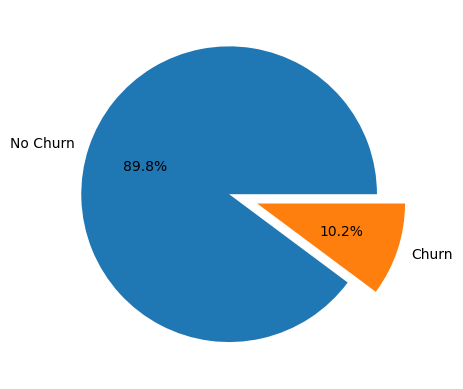

In [201]:
plt.pie(data['churn_probability'].value_counts(),labels=["No Churn","Churn"],autopct="%1.1f%%",explode=[0,0.2])
plt.show()

- We have about 10.2% churn rate as of now.

## Data Cleaning and Preprocessing

#### Function to impute values

In [202]:
from typing import Union

def fill_null_value(data:pd.DataFrame,col:str,value:Union[None,str,int] = None,type_of_imputation: Union[None, str] = None):

    if type_of_imputation not in [None, "mean", "median"]:
        raise ValueError("type_of_imputation must be None, 'mean', or 'median'")

    if type_of_imputation == None:
        data[col] = data[col].fillna(value=value)

    elif type_of_imputation == "mean":
        data[col] = data[col].fillna(data[col].mean())

    elif type_of_imputation == "median":
        data[col] = data[col].fillna(data[col].median())

    return "Imputation Successful..."

#### Function to drop columns

In [203]:
def drop_cols(data:pd.DataFrame,cols:Union[list,str]):

    print(f"Number of cols before dropping: {data.shape[1]}")

    data = data.drop(cols,axis=1)

    print(f"Number of cols after dropping: {data.shape[1]}")

    return data

#### Function to get a summary of null values

In [204]:
def null_values_df(data):

    # Initialize lists to store column names and their corresponding null value counts
    column_list = []
    null_value_list = []
    percent_missing = []

    # Iterate through each column in the DataFrame
    for i in data.columns:
        # Check if the column has any null values
        if data[i].isna().sum() > 0:
            column_list.append(i)  # Append column name to the list
            null_value_list.append(data[i].isna().sum())  # Append count of null values to the list
            percent_missing.append((data[i].isna().sum()/data.shape[0])*100) # Append the percentage of null values to the list

    # Create a DataFrame from the lists
    null_values_df_report = pd.DataFrame({'Column': column_list,'Null Values': null_value_list,'Percent_Missing':percent_missing})

    return null_values_df_report

In [205]:
null_values_df(data)

,Column,Null Values,Percent_Missing
0,loc_og_t2o_mou,702,1.002871
1,std_og_t2o_mou,702,1.002871
2,loc_ic_t2o_mou,702,1.002871
3,last_date_of_month_7,399,0.570008
4,last_date_of_month_8,733,1.047158
...,...,...,...
120,night_pck_user_7,52134,74.478207
121,night_pck_user_8,51582,73.689624
122,fb_user_6,52431,74.902499
123,fb_user_7,52134,74.478207


#### loc_og_t2o_mou & std_og_t2o_mou & loc_ic_t2o_mou

In [206]:
data['loc_og_t2o_mou'].value_counts(), data['std_og_t2o_mou'].value_counts(), data['loc_ic_t2o_mou'].value_counts()

(loc_og_t2o_mou
 0.0    69297
 Name: count, dtype: int64,
 std_og_t2o_mou
 0.0    69297
 Name: count, dtype: int64,
 loc_ic_t2o_mou
 0.0    69297
 Name: count, dtype: int64)

Lets just drop these columns are they have no variety of values for a ML model

In [207]:
data = drop_cols(data,['loc_og_t2o_mou','std_og_t2o_mou','loc_ic_t2o_mou'])

Number of cols before dropping: 172
Number of cols after dropping: 169


#### Date Columns

lets also drop date columns as we dont think they add any value because these are of specific months itself

In [208]:
data = drop_cols(data,['last_date_of_month_6','last_date_of_month_7','last_date_of_month_8'])

Number of cols before dropping: 169
Number of cols after dropping: 166


#### Dropping empty rows for onnet and offnet columns as the percentage of missing values are very low

In [209]:
data = data.dropna(subset=['onnet_mou_6'],axis=0,how='all')
data = data.dropna(subset=['onnet_mou_7'],axis=0,how='all')
data = data.dropna(subset=['onnet_mou_8'],axis=0,how='all')
data = data.dropna(subset=['offnet_mou_6'],axis=0,how='all')
data = data.dropna(subset=['offnet_mou_7'],axis=0,how='all')
data = data.dropna(subset=['offnet_mou_8'],axis=0,how='all')

In [210]:
data.shape

(63842, 166)

In [211]:
null_values_df(data)

,Column,Null Values,Percent_Missing
0,date_of_last_rech_6,513,0.803546
1,date_of_last_rech_7,459,0.718962
2,date_of_last_rech_8,1073,1.680712
3,date_of_last_rech_data_6,47632,74.609191
4,date_of_last_rech_data_7,47135,73.830707
5,date_of_last_rech_data_8,46415,72.702923
6,total_rech_data_6,47632,74.609191
7,total_rech_data_7,47135,73.830707
8,total_rech_data_8,46415,72.702923
9,max_rech_data_6,47632,74.609191
